In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import sys

sys.path.append(str(b3d.get_root_path()))

In [3]:
from tests.sama4d.video_to_tracks.video_to_tracks_task import VideoToTracksTask

In [41]:
path = b3d.get_assets_path() / 'shared_data_bucket/dynamic_SfM/feature_track_data/pan_around_blocks.npz'
ftd_og = b3d.io.FeatureTrackData.load(str(path)).slice_time(20, 35)

In [42]:
import rerun
rerun.init("multiple_patch_tracking-3")
rerun.connect("127.0.0.1:8812")

In [43]:
task = VideoToTracksTask.from_feature_track_data(ftd_og, has_no_moving_objects=True)
task.visualize_task()

In [44]:
from tests.sama4d.video_to_tracks.solvers.conv_from_grid import KeypointTracker2DFromInitialGrid

spec = task.get_task_specification()
solver = KeypointTracker2DFromInitialGrid(
    grid_size_x=12, grid_size_y=12, patch_size=11, do_reinitialization=True
)
solution = solver.solve(spec, save_states=True)

In [25]:
solver.visualize_solver_state()

In [45]:
solver.update_blueprint(31)

In [46]:
metrics = task.score(solution)
metrics

/home/georgematheos/b3d/tests/sama4d/video_to_tracks/video_to_tracks_task.py:156: UserWarning: The current scoring logic is a placeholder; it needs to be implemented.
  warnings.warn(


{'all_distance_errors': Array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'mean_distance_error_over_time': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32),
 'overall_mean_distance_error': Array(0., dtype=float32),
 'n_keypoints_visible': Array([144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144,
        144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144,
        144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144,
        144], dtype=int32)}

In [47]:
task.visualize_solution(solution, metrics)

In [48]:
path = b3d.get_assets_path() / 'shared_data_bucket/dynamic_SfM/feature_track_data/pan_around_blocks.npz'
ftd_og = b3d.io.FeatureTrackData.load(str(path)).slice_time(20)

In [49]:
import rerun
rerun.init("multiple_patch_tracking-4")
rerun.connect("127.0.0.1:8812")

In [60]:
task.visualize_task()

In [54]:
spec = task.get_task_specification()
solver = KeypointTracker2DFromInitialGrid(
    grid_size_x=12, grid_size_y=12, patch_size=11, do_reinitialization=True
)
solution = solver.solve(spec, save_states=True)

In [59]:
# Send a blueprint
solver.update_blueprint(31)

In [56]:
metrics = task.score(solution)
metrics

/home/georgematheos/b3d/tests/sama4d/video_to_tracks/video_to_tracks_task.py:156: UserWarning: The current scoring logic is a placeholder; it needs to be implemented.
  warnings.warn(


{'all_distance_errors': Array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'mean_distance_error_over_time': Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.], dtype=float32),
 'overall_mean_distance_error': Array(0., dtype=float32),
 'n_keypoints_visible': Array([144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144,
        144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144,
        144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144,
        144], dtype=int32)}

In [57]:
task.visualize_solution(solution, metrics)

In [58]:
solver.visualize_solver_state()

In [63]:
ftd2 = task.get_feature_track_data_from_solution(solution)

In [72]:
ftd2.save("pan_around_blocks_crude_tracks.npz")

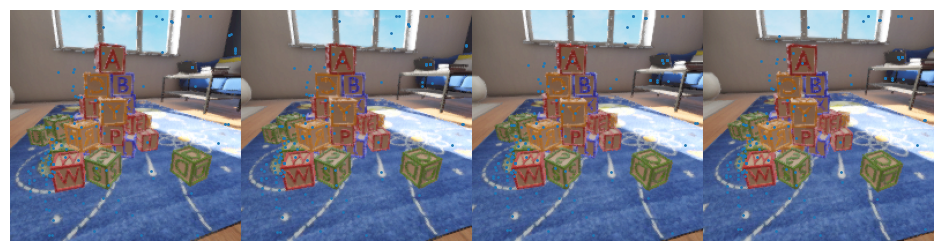

In [71]:
ftd2.slice_time(20, 24).quick_plot(downsize=1)